# Importing Libraries

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [377]:
data = pd.read_csv('car_age_price.csv')

In [378]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [379]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [380]:
data.shape

(112, 2)

In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [383]:
print(data.dtypes)

Year     int64
Price    int64
dtype: object


In [384]:
data.Price.describe()

count       112.000000
mean     483866.044643
std       91217.450533
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      755000.000000
Name: Price, dtype: float64

In [385]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [386]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [387]:
data['Price'].nunique()

35

In [388]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Heatmap

<AxesSubplot:>

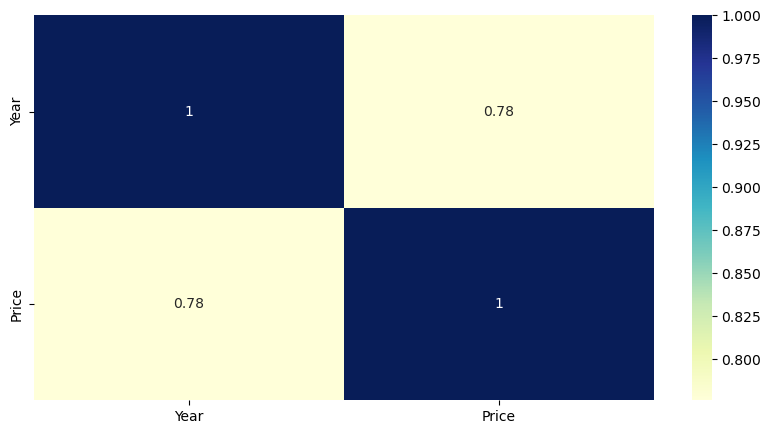

In [389]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

# Regression plot for Relationship between Year and Price

<AxesSubplot:title={'center':'Relationship between Year and Price'}, xlabel='Year', ylabel='Price'>

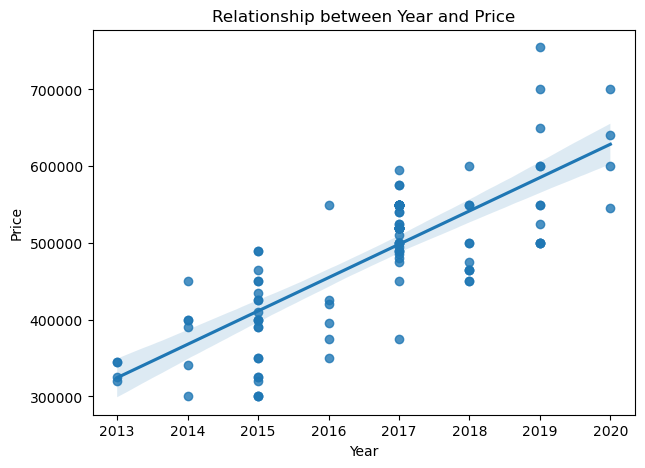

In [390]:
fig=plt.figure(figsize=(7,5))
plt.title('Relationship between Year and Price')
sns.regplot(x='Year', y='Price',data = data)

# Initialising x and y where y is Target variable

In [391]:
y= data['Price']#target
x= data.drop(['Price'],axis=1)

# Splitting for testing and training

In [392]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [393]:
x_test.shape

(34, 1)

In [394]:
x_train.shape

(78, 1)

In [395]:
y_test.shape

(34,)

In [396]:
y_train.shape

(78,)

# Creating Linear Regression Model

In [397]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#scaler =StandardScaler()

In [398]:
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [399]:

model= LinearRegression() 

In [400]:
model.fit(x_train,y_train)

LinearRegression()

In [401]:
pred = model.predict(x_test)

In [402]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE is : ',mean_absolute_error(pred,y_test)) 
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  50966.62199524177
MSE is :  3962573261.894448
R2 is :  0.3764280057772862


# Predicting the price for the year 2022

In [403]:
model.predict([[2022]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([738670.65829848])

# Regression Plot Actual Price Vs Predicted price with linear regression

Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

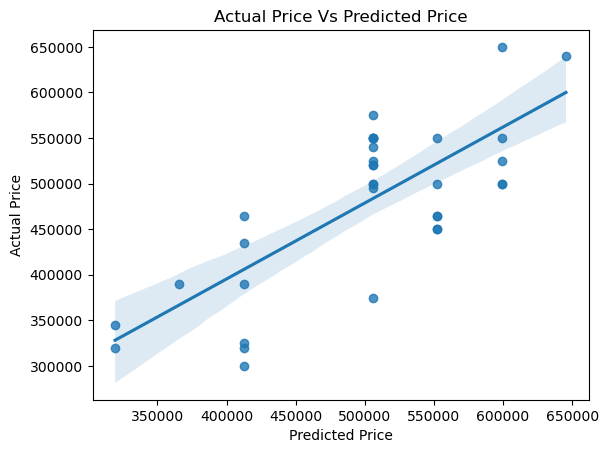

In [404]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual Price Vs Predicted Price")

# Regression plot for Relation between Year and Predicted price Vs Year and Price

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relation between Year and Predicted price Vs Year and Price '}, xlabel='Year', ylabel='Price'>

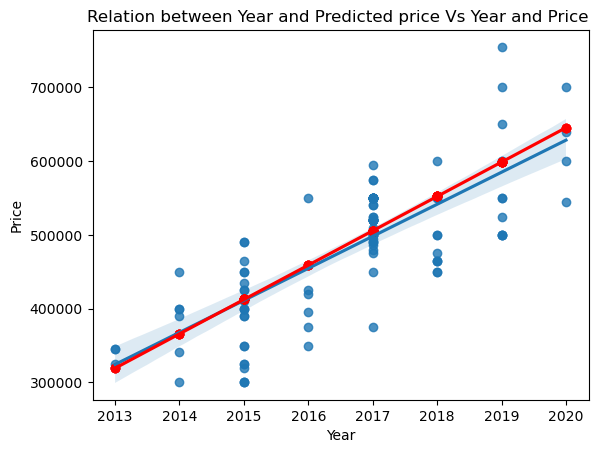

In [405]:
#fig=plt.figure(figsize=(7,5))
plt.title('Relation between Year and Predicted price Vs Year and Price ')
sns.regplot(x='Year', y='Price',data = data)
sns.regplot(data.Year,model.predict(data[['Year']]),color='red')

# Lasso Regression( Least Absolute Shrinkage and Selection Operator)

In [406]:
from sklearn.linear_model import Lasso
lasso = Lasso (alpha=1.0)
model1 = lasso.fit(x_train,y_train)
model1

Lasso()

In [407]:
pred = lasso.predict(x_test)
#lasso.fit(x_train,y_train)
print('MAE is : ',mean_absolute_error(pred,y_test))
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  50966.34042989638
MSE is :  3962549680.6533012
R2 is :  0.3764209007824255


In [408]:
model1.predict([[2022]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([738668.46702529])

# Inference/Conclusion about the findings from the models

In [409]:
#HERE WE HAVE NOT DONE THE NORMALIZATIONS AND WE GET VALUES OF MSE, MAE AND R2 SCORE AS ABOVE.

In [410]:
#Once the model is built on the training set, we can make the predictions
#Here last part of code prints the evaluation metrics - RMSE and R-squared - on the test data set.
#Here we get mse as a bigger value and r2 score can be taken 37% for both the models of linear regression and lasso.
#hence if taken decimal values, lasso can be seen better than linear but still both delivers 37% performance only.

# If we have done NORMALIZATION,following will be the results 

# Checking for Ouliers

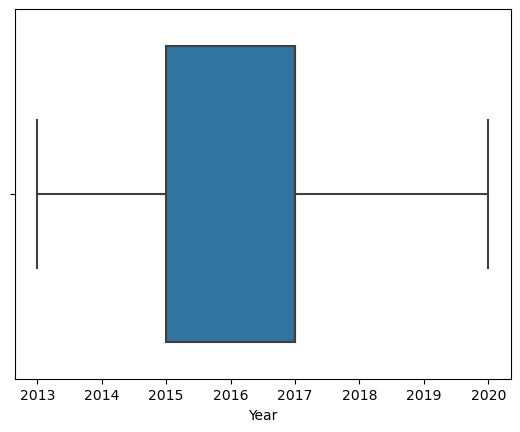

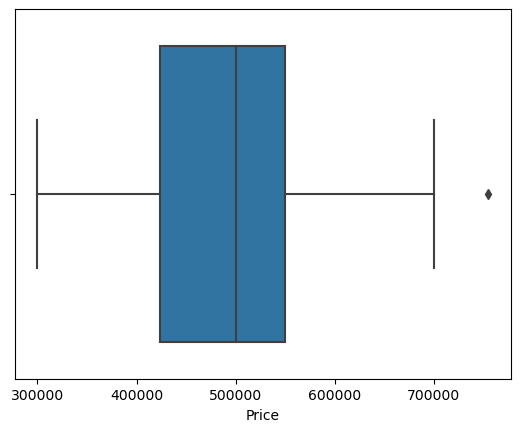

In [411]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# Removing outliers

In [412]:
from scipy import stats
IQR =stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [413]:
Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [414]:
data.loc[data.Price<min_limit]

,Year,Price


In [415]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


In [416]:
data.loc[data['Price']>max_limit,'Price']=np.median(data.Price)

In [417]:
data.loc[data.Price>max_limit]

,Year,Price


# Normalization

In [418]:
from sklearn import preprocessing

In [419]:
df = preprocessing.normalize(data)
norm_df = pd.DataFrame(df, columns=data.columns)
norm_df

,Year,Price
0,0.004340,0.999991
1,0.004038,0.999992
2,0.002884,0.999996
3,0.004340,0.999991
4,0.004340,0.999991
...,...,...
107,0.005376,0.999986
108,0.006713,0.999977
109,0.004741,0.999989
110,0.004800,0.999988


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

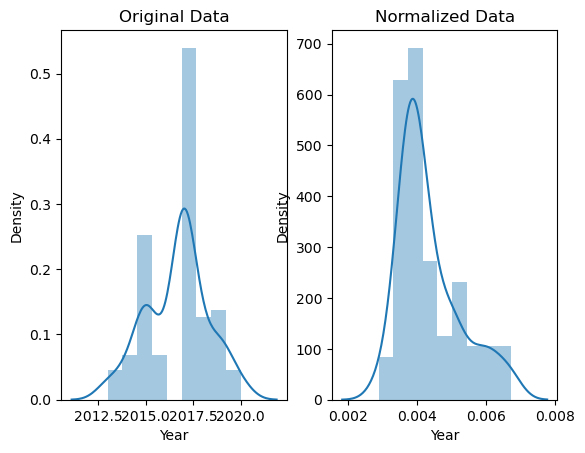

In [420]:
fig,ax=plt.subplots(1,2)
sns.distplot(data.Year,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(norm_df.Year,ax=ax[1])
ax[1].set_title("Normalized Data")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

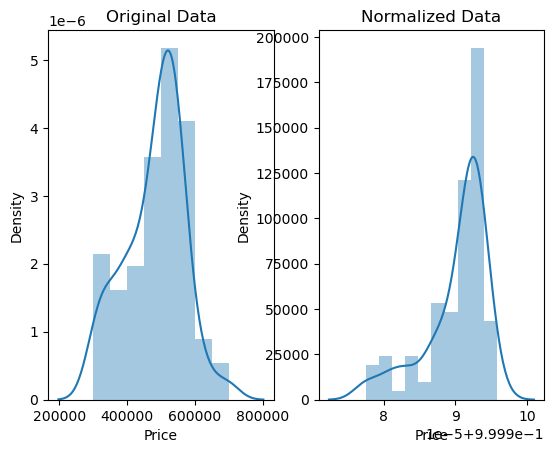

In [421]:
fig,ax=plt.subplots(1,2)
sns.distplot(data.Price,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(norm_df.Price,ax=ax[1])
ax[1].set_title("Normalized Data")

In [422]:
y= data['Price']#target
x1= norm_df.drop(['Price'],axis=1)

# Linear Regression for Normalized Data

In [423]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=.1,random_state=42)

In [424]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [425]:
model_norm= LinearRegression() 

In [426]:
model_norm.fit(x1_train,y1_train)

LinearRegression()

In [427]:
pred_norm_lr= model_norm.predict(x1_test)

In [428]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE is : ',mean_absolute_error(pred_norm_lr,y_test))
print('MSE is : ',mean_squared_error(pred_norm_lr,y_test))
print('R2 is : ',r2_score(pred_norm_lr,y_test))

MAE is :  13451.834229098016
MSE is :  336291618.0724891
R2 is :  0.9631881520192624


# Lasso Regression for Normalized Data

In [429]:
from sklearn.linear_model import Lasso
lasso = Lasso (alpha=1.0)
model1_norm = lasso.fit(x1_train,y1_train)
model1_norm

Lasso()

In [430]:
pred = lasso.predict(x1_test)
#lasso.fit(x_train,y_train)
print('MAE is : ',mean_absolute_error(pred,y_test))
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  13146.817051475451
MSE is :  302641064.4496341
R2 is :  0.9659766113468933


# Inference/Conclusion

In [431]:
#Here also mse value is greater for both Linear and lasso models
#But r2 score implies we have 96.3% for Linear Regression model and 96.5% for Lasso Regression model,
#which makes Lasso a better performance model.
#In general, the higher the R-squared, the better the model fits the data.